In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random

In [3]:
# Generate an arbitrary input distribution
def generate_data(samples=1000):
    """Generates data with a specified distribution."""
    mean = [0, 0] # Mean of the distribution
    cov = [[3, 2], [2, 2]] # Covariance matrix
    data = np.random.multivariate_normal(mean, cov, samples)
    
    return data

In [4]:
class Neuron:
    def __init__(self, n_inputs, learning_rate=0.01, num_iters=1000):
        self.weights = np.random.randn(n_inputs)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate
        self.num_iters = num_iters
    def activate(self, x):
        # Threshold Activation
        return 1 if x>0.5 else 0
    def fit(self, x_tr, y_tr):
        y_hat = self.activate(np.dot(x_tr, self.weights) + self.bias)
        loss = y_tr - y_hat
        self.weights += loss*self.learning_rate*x_tr
        self.bias += self.learning_rate*loss
        return loss, y_tr==y_hat
    def predict(self, x):
        return self.activate(np.dot(x, self.weights)+self.bias)
    def train(self, x_tr, y_tr):
        loss = []
        accuracy = []
        for epoch in range(self.num_iters):
            idx = random.randint(0, len(x_tr)-1)
            L, A = self.fit(x_tr[idx], y_tr[idx])
            loss.append(L)
            accuracy.append(A)
        return loss, accuracy

In [5]:
# Generate input data
data = generate_data(samples=1000)

In [20]:
# Initialize and train the neuron
input_dim = 2
learning_rate = 0.01
neuron = Neuron(2, num_iters=2000)

In [1]:
# Train the neuron for multiple epochs
loss, acc =neuron.train(data, [i[0]+i[1] for i in data])

NameError: name 'neuron' is not defined

In [22]:
# Extract the principal component using PCA for comparison
pca = PCA(n_components=1)

pca.fit(data)
principal_component = pca.components_[0]

In [23]:
# Normalize the neuron's weights and principal component for comparison
weights_normalized = neuron.weights / np.linalg.norm(neuron.weights)
principal_component_normalized = principal_component / np.linalg.norm(principal_component)

In [24]:
# Print results
print("Normalized Neuron Weights (Hebbian):", weights_normalized)
print("Normalized Principal Component (PCA):", principal_component_normalized)

Normalized Neuron Weights (Hebbian): [0.77926208 0.62669818]
Normalized Principal Component (PCA): [0.78790343 0.61579882]


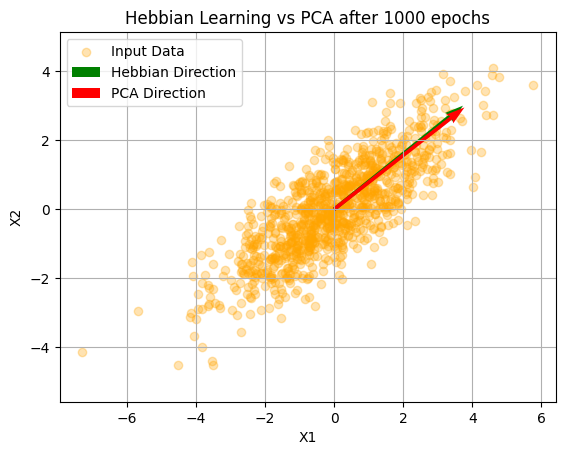

In [25]:
# Visualize the data and learned direction
plt.scatter(data[:, 0], data[:, 1], alpha=0.3, color="orange",label="Input Data")
plt.quiver(weights_normalized[0], weights_normalized[1], color='green', scale=3,
label="Hebbian Direction")
plt.quiver(0, 0, principal_component_normalized[0],
principal_component_normalized[1], color='red', scale=3, label="PCA Direction")
plt.legend()
plt.title("Hebbian Learning vs PCA after 1000 epochs")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.axis('equal')
plt.show()